Практикум №6<br>
Дисципліна: Обробка та аналіз БМД<br>
Студент: Збаровський Дмитро<br>
Група: БС-81

# Завдання

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище. Формат даних:

| Група 1 | Група 2  | 
| ------------- |--------- |
| $k_{1}  $   | $k_{2}$   |
| $...$   | $...$   |
| $k_{1n}$   | $k_{2n}$   |

2. Побудувати графік, що відображає розкид даних в групах. Приклад:
![alt text](https://s3.amazonaws.com/libapps/accounts/2515/images/spss_paired-t_example_boxplot.PNG)

3. Написати функції:
* для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

* для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant). 

4. Перевірити розбіжність на між групами на даних з п. 1. 

5. Сформувати висновок про взаємозв'язок між групами та про їх розбіжність. 

In [15]:
import seaborn as sns
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline

In [19]:
rNums1 = np.round(np.random.normal(loc=5, scale=5, size=30))
rNums2 = np.round(np.random.normal(loc=5, scale=5, size=30))

table = pd.DataFrame({
    'Data_1': rNums1,
    'Data_2': rNums2
    })

table

,Data_1,Data_2
0,2.0,9.0
1,14.0,7.0
2,7.0,5.0
3,4.0,10.0
4,0.0,-4.0
5,2.0,7.0
6,8.0,7.0
7,13.0,8.0
8,-2.0,9.0
9,0.0,24.0


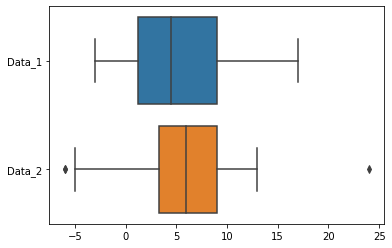

In [20]:
sns.boxplot(data=table, orient='h')

In [34]:
def sign_pearson(a, b):
    n = len(a)
    df_compare = n-2
    r = ( n * (a*b).sum() - (a.sum()*b.sum()) ) / math.sqrt( ( n*(pow(a,2).sum()) - pow(a.sum(), 2) ) * (n*(pow(a,2)).sum() - pow(b.sum(),2)))
    pearson = pd.read_excel('Таблица критических значений для парного критерия.xlsx')
    
    try:
        cmp_value = pearson[pearson['df'] == df_compare][0.05].values[0]
    except:
        df_compare = min(pearson['df'].values, key=lambda x:abs(int(x)-df_compare) )
        cmp_value = pearson[pearson['df'] == df_compare][0.05].values[0]
    
    sign = "significant" if abs(r) > cmp_value else "not significant"
    return abs(r), df_compare, sign
    
sign_pearson(df['Data_1'], df['Data_2'])

(0.1422450925542671, 28, 'not significant')

In [33]:
def sign_student(a, b):
    d = a - b
    n = len(a)
    df_compare = n - 1
    
    student = pd.read_excel('Таблиця критичних значень кореляційного аналізу.xlsx')
    mu = d.mean()
    sigma = d.std()
    t = mu / sigma * math.sqrt(n)
    
    try:
        cmp_value = student[student['df'] == df_compare][0.05].values[0]
    except:
        df_compare = min(student["df"].values[:-1], key=lambda x:abs(int(x)-df_compare))
        cmp_value = student[student['df'] == df_compare][0.05].values[0]
    
    sign = "Significant" if abs(t) > cmp_value else "Not significant"
    return abs(t), df_compare, sign
    
sign_student(df['Data_1'], df['Data_2'])

(0.8155596941235504, 30, 'Significant')

Висновок<br>
1. Під час аналізу цих двох груп статична залежність не була визначена.<br>
2. Виходячи з порівняння за критерієм Стьюдента, можна зробити висновок, що приймається гіпотеза про відмінність середніх.